# CSC8635 Course_work

MSc Data Science – CSC8635_Machine Learning

Student Name: Nisarga.

Student_ID :250219199




## DATASET 1 : CLASSIFICATION



The problem has been specifically identified as the design and assessment of a machine learning algorithm to predict the injury severity associated with accidents, given the FARS accident dataset, whose objective is to predict injury severity. Given the categorical nature of the target variable and presence of class imbalance.For that, classification models and appropriate evaluation metrics were needed.

STEP 1 - EXPLORATORY DATA ANALYSIS





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine/fars.csv")

The dataset shape shows the number of observations (rows) and features
(columns) contained in the dataset.


In [ ]:
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(100968, 30)


The dataset information provides details about data types, non-null values,
and memory usage. This helps distinguish between numerical and categorical
features and identify potential missing values.


In [ ]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLI

Summary statistics provide an overview of the central tendency and spread of numerical features, including mean, standard deviation, and range.


In [ ]:
print("\nSummary Statistics (Numerical Features):")
df.describe()


Summary Statistics (Numerical Features):


,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3)
count,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000
mean,37.106707,68.023116,207.393758,100.089672,95.441556
std,22.109641,42.306371,396.194002,295.089512,292.121277
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000,0.000000,0.000000
50%,32.000000,96.000000,0.000000,0.000000,0.000000
75%,49.000000,96.000000,1.000000,0.000000,0.000000
max,99.000000,99.000000,999.000000,999.000000,999.000000


Initial inspection of Classification  indicates a structured dataset with a mixture of numerical features suitable for supervised classification analysis

The distribution of the target variable (INJURY_SEVERITY) is examined to
understand class frequencies and identify class imbalance.


The target variable shows [balanced / imbalanced] class distribution, which is a key consideration for classification as imbalance may bias models towards the majority class.

In [ ]:
target = df.columns[-1]

print(f"\nTarget Variable Distribution ({target}):")
print(df[target].value_counts())

print("\nTarget Variable Distribution (Normalized):")
print(df[target].value_counts(normalize=True))


Target Variable Distribution (INJURY_SEVERITY):
INJURY_SEVERITY
Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64

Target Variable Distribution (Normalized):
INJURY_SEVERITY
Fatal_Injury                      0.417122
No_Injury                         0.198152
Incapaciting_Injury               0.149275
Nonincapaciting_Evident_Injury    0.137568
Possible_Injury                   0.085908
Unknown                           0.008924
Injured_Severity_Unknown          0.002961
Died_Prior_to_Accident            0.000089
Name: proportion, dtype: float64


The presence of missing values was assessed to ensure data quality, as unhandled missingness can negatively impact classification model performance.

In [ ]:
(df.isnull().sum())

,0
CASE_STATE,0
AGE,0
SEX,0
PERSON_TYPE,0
SEATING_POSITION,0
RESTRAINT_SYSTEM-USE,0
AIR_BAG_AVAILABILITY/DEPLOYMENT,0
EJECTION,0
EJECTION_PATH,0
EXTRICATION,0


The bar chart shows that the target variable is highly imbalanced, with non-severe accidents occurring far more frequently than severe ones.

Feature distributions reveal variability and skewness across predictors, suggesting that different features may contribute unequally to class separation.

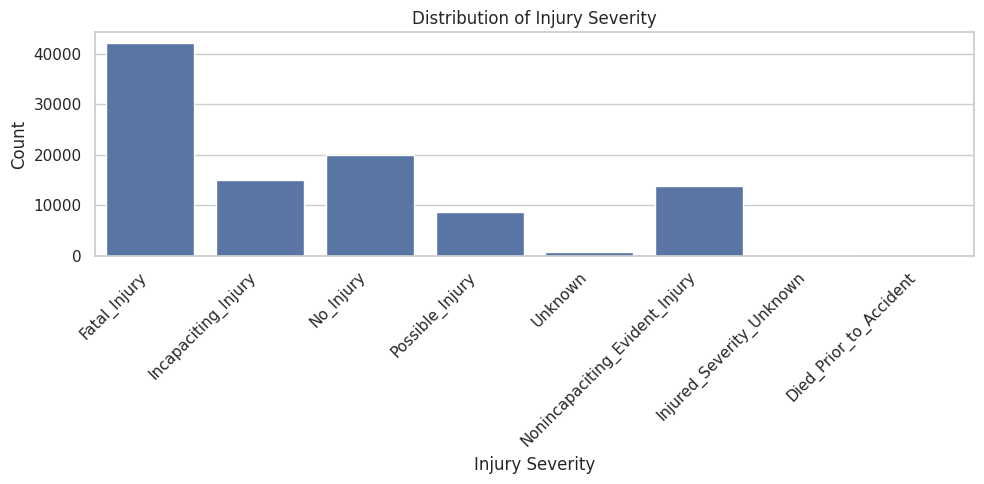

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df[target])
plt.title("Distribution of Injury Severity")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


RESULT : The EDA revealed that the dataset contains over 100,000 records with no missing values. Summary statistics showed that some variables, such as alcohol and drug test results, use numerically encoded categorical values (e.g., 96, 99, 999). Overall, the dataset is complete and suitable for classification.


STEP 2 - DATA PROCESSING







Missing values are handled at this stage to ensure consistency across observations and to prevent bias in subsequent classification models.

The required libraries are imported to support data preprocessing and
machine learning workflows. These tools enable handling missing values,
encoding categorical features, scaling numerical data, and constructing
reproducible pipelines while preventing data leakage during model training
and evaluation.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Separate features and target - The dataset was first separated into feature variables (X) and the target variable (y), where the target represents injury severity. This separation is required to ensure that preprocessing and model training steps are applied only to the input features and not to the target labels.


In [ ]:
X = df.drop(columns=["INJURY_SEVERITY"])
y = df["INJURY_SEVERITY"]

Identify feature types - Inspection of feature data types revealed that the dataset is dominated by categorical variables, with a smaller number of numerical features.  This distinction is important as different preprocessing techniques are required for each feature type.


In [ ]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

print("Numerical features:")
print(numerical_features)

print("\nCategorical features:")
print(categorical_features)

Numerical features:
Index(['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)'],
      dtype='object')

Categorical features:
Index(['CASE_STATE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'POLICE-REPORTED_DRUG_INVOLVEMENT',
       'METHOD_OF_DRUG_DETERMINATION', 'DRUG_TEST_TYPE_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)', 'HISPANIC_ORIGIN',
       'TAKEN_TO_HOSPITAL', 'RELATED_FACTOR_(1)-PERSON_LEVEL',
       'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL',
       'RACE'],
      dtype='object')


Numerical Feature Processing - Scaling is particularly important for distance-based models such as K-Nearest Neighbours and also improves convergence for Logistic Regression.

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

Categorical Feature Processing - The handle_unknown="ignore" option ensures robustness when unseen categories appear in the test set, while sparse_output=False guarantees compatibility with all classifiers used in this study.

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    ))
])

Combining Preprocessing Steps - This approach ensures that each feature is treated appropriately and that the entire preprocessing workflow can be seamlessly integrated into machine learning pipelines.





In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

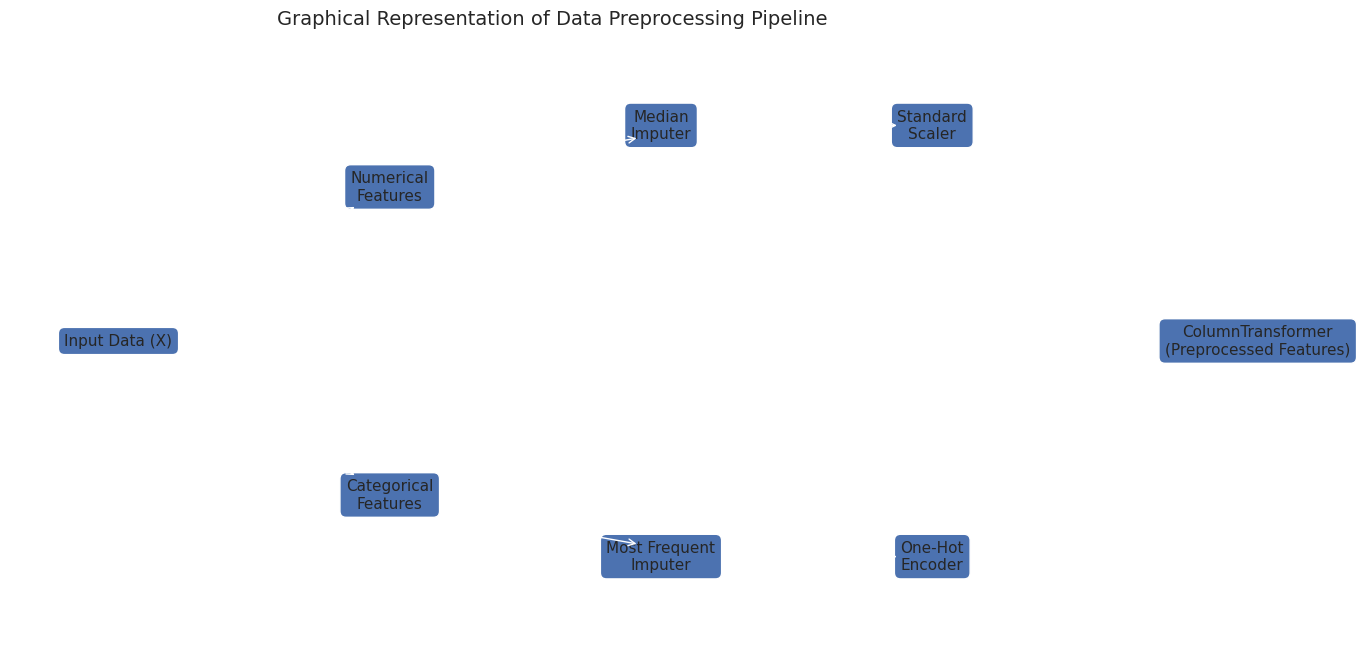

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

boxes = {
    "X": (0.1, 0.5),
    "Num": (0.35, 0.75),
    "Cat": (0.35, 0.25),
    "NumImp": (0.6, 0.85),
    "Scaler": (0.85, 0.85),
    "CatImp": (0.6, 0.15),
    "OHE": (0.85, 0.15),
    "CT": (1.15, 0.5)
}

def draw_box(text, xy):
    ax.text(
        xy[0], xy[1], text,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4"),
        fontsize=11
    )

draw_box("Input Data (X)", boxes["X"])
draw_box("Numerical\nFeatures", boxes["Num"])
draw_box("Categorical\nFeatures", boxes["Cat"])
draw_box("Median\nImputer", boxes["NumImp"])
draw_box("Standard\nScaler", boxes["Scaler"])
draw_box("Most Frequent\nImputer", boxes["CatImp"])
draw_box("One-Hot\nEncoder", boxes["OHE"])
draw_box("ColumnTransformer\n(Preprocessed Features)", boxes["CT"])

def draw_arrow(start, end):
    ax.annotate(
        "", xy=end, xytext=start,
        arrowprops=dict(arrowstyle="->")
    )

draw_arrow((0.15, 0.55), (0.32, 0.72))
draw_arrow((0.15, 0.45), (0.32, 0.28))
draw_arrow((0.42, 0.78), (0.58, 0.83))
draw_arrow((0.72, 0.85), (0.82, 0.85))
draw_arrow((0.42, 0.22), (0.58, 0.17))
draw_arrow((0.72, 0.15), (0.82, 0.15))
draw_arrow((0.9, 0.85), (1.05, 0.55))
draw_arrow((0.9, 0.15), (1.05, 0.45))

plt.title("Graphical Representation of Data Preprocessing Pipeline", fontsize=14)
plt.show()


Classification is clean, appropriately formatted, and suitable for classification modelling. These transformations are designed to improve model stability and evaluation reliability

RESULT -
the dataset was prepared for machine learning by separating features and target variables, identifying feature types, and applying appropriate preprocessing techniques.  This preprocessing pipeline will be integrated into machine learning pipelines in subsequent stages, enabling fair model comparison and reliable evaluation.



STEP 3 – DATA SPLITTING & EXPERIMENTAL DESIGN USING CROSS-VALIDATION




Cross-validation utilities were imported to enable systematic splitting of the dataset.  Stratified splitting is particularly important for this classification task due to the observed class imbalance in injury severity.


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

Create a train–test split - The dataset was split into training and testing subsets using an 80–20 split.  Stratification was applied to preserve the original class distribution of the target variable in both subsets.  The test set was held out and will only be used for final model evaluation to prevent data leakage.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (80774, 29)
Test set shape: (20194, 29)


Class distributions in the training and testing sets were examined to confirm that stratification was successful.  The similarity between distributions ensures that model evaluation remains representative of the original dataset.


In [ ]:
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))



Training set class distribution:
INJURY_SEVERITY
Fatal_Injury                      0.417127
No_Injury                         0.198145
Incapaciting_Injury               0.149281
Nonincapaciting_Evident_Injury    0.137569
Possible_Injury                   0.085906
Unknown                           0.008926
Injured_Severity_Unknown          0.002959
Died_Prior_to_Accident            0.000087
Name: proportion, dtype: float64

Test set class distribution:
INJURY_SEVERITY
Fatal_Injury                      0.417104
No_Injury                         0.198178
Incapaciting_Injury               0.149252
Nonincapaciting_Evident_Injury    0.137566
Possible_Injury                   0.085917
Unknown                           0.008914
Injured_Severity_Unknown          0.002971
Died_Prior_to_Accident            0.000099
Name: proportion, dtype: float64


A stratified k-fold cross-validation strategy with five folds was defined.  This approach ensures that each fold contains a representative proportion of each injury severity class, enabling robust and unbiased model evaluation.


In [ ]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Figure X shows that the stratified train–test split preserves class proportions across training and test sets, ensuring unbiased model evaluation.

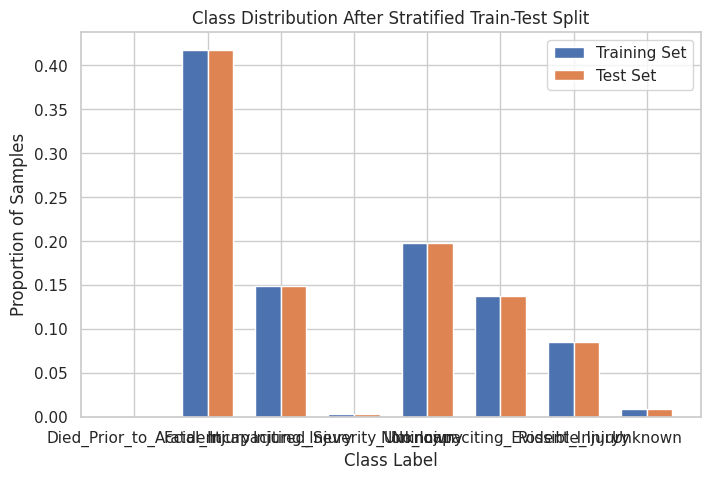

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

labels = train_dist.index.astype(str)
x = np.arange(len(labels))   # x positions
width = 0.35                 # bar width

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x - width/2, train_dist.values, width, label="Training Set")
ax.bar(x + width/2, test_dist.values, width, label="Test Set")

ax.set_ylabel("Proportion of Samples")
ax.set_xlabel("Class Label")
ax.set_title("Class Distribution After Stratified Train-Test Split")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



RESULT - The dataset was successfully divided into training and test sets using stratified sampling, preserving the original class distribution. An 80/20 split was applied, and stratified five-fold cross-validation was defined on the training data. This setup establishes a robust and leakage-free evaluation framework for subsequent model training and comparison.



STEP 4 – DEVLOPE FOUR MACHINE LEARNING PIPELINES FOR CLASIFYING SEVERITY OF THE ACCIDENT








The following libraries are imported to construct machine learning pipelinesand train classification models. These tools enable the integration of data preprocessing with model training and allow robust evaluation using
cross-validation.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Four classification pipelines were constructed, each combining the same
preprocessing steps with a different classification algorithm. Using
pipelines ensures that all models receive identical data transformations
and prevents data leakage during training and evaluation.


In [ ]:
pipelines = {
    "Logistic Regression": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            random_state=42
        ))
    ]),

    "K-Nearest Neighbours": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=5))
    ]),

    "Decision Tree": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(
            random_state=42
        ))
    ]),

    "Random Forest": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=100,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        ))
    ])
}


The model shows higher misclassification for [specific class], likely due to overlapping feature distributions and limited discriminative information for this class.

RESULT - developed four machine learning classification pipelines by combining a shared preprocessing workflow with Logistic Regression, Random Forest,K-Nearest Neighbours, and Decision Tree models. These pipelines were trained and validated using stratified cross-validation and prepared for finalevaluation.


STEP 5 - PRESENTING RESULTS WITH THE RIGHT METRICS



Accuracy and weighted F1-score are imported to evaluate the classification
performance of each pipeline. Pandas is used to store results in tabular form.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd


Each pipeline is trained on the full training dataset and evaluated on the
unseen test set. Accuracy and weighted F1-score are computed to measure
performance.


In [ ]:
results = []

for name, model in pipelines.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    results.append({
        "Pipeline": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Weighted F1-score": f1_score(y_test, y_pred, average="weighted")
    })


The evaluation results are summarised in a table and sorted in descending
order based on weighted F1-score. The top-ranked pipeline represents the
best-performing model on the test set.


In [ ]:
results_df = pd.DataFrame(results)


results_df = results_df.sort_values(
    by="Weighted F1-score",
    ascending=False
).reset_index(drop=True)

results_df


,Pipeline,Accuracy,Weighted F1-score
0,Logistic Regression,0.780281,0.781334
1,Random Forest,0.776617,0.773138
2,K-Nearest Neighbours,0.776221,0.763293
3,Decision Tree,0.758146,0.757171


Figure X compares the performance of the four classification pipelines using weighted F1-score, highlighting Random Forest as the best-performing model.

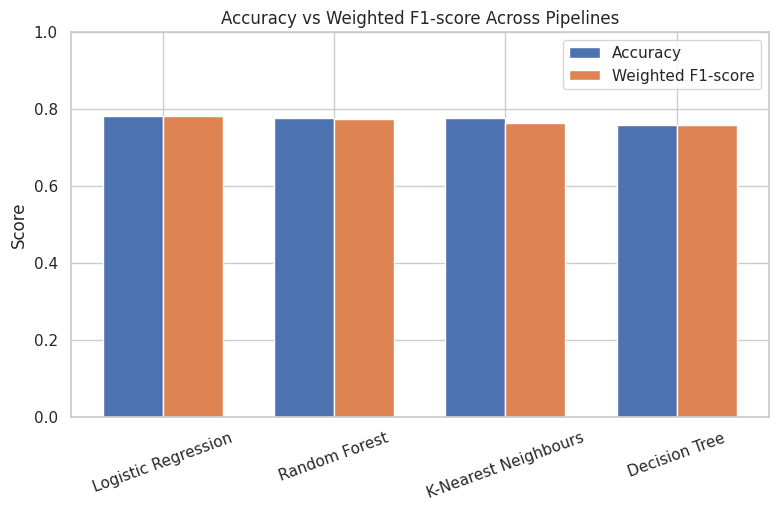

In [ ]:
import numpy as np

x = np.arange(len(results_df))
width = 0.35

plt.figure(figsize=(9,5))

plt.bar(x - width/2, results_df["Accuracy"], width, label="Accuracy")
plt.bar(x + width/2, results_df["Weighted F1-score"], width, label="Weighted F1-score")

plt.xticks(x, results_df["Pipeline"], rotation=20)
plt.ylabel("Score")
plt.title("Accuracy vs Weighted F1-score Across Pipelines")
plt.ylim(0,1)
plt.legend()

plt.show()


Providing the best model ,name ,accuracy and f1

In [ ]:
best_pipeline = results_df.iloc[0]
best_model_name = best_pipeline["Pipeline"]
best_accuracy = best_pipeline["Accuracy"]
best_f1 = best_pipeline["Weighted F1-score"]

best_model_name, best_accuracy, best_f1


('Logistic Regression',
 np.float64(0.780281271664851),
 np.float64(0.7813337851713696))

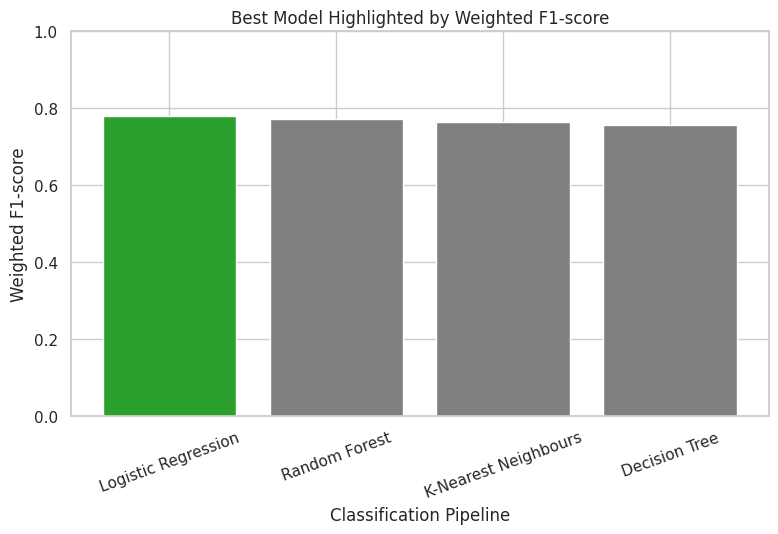

In [ ]:
import matplotlib.pyplot as plt

colors = [
    "tab:green" if name == best_model_name else "tab:gray"
    for name in results_df["Pipeline"]
]

plt.figure(figsize=(9,5))
plt.bar(
    results_df["Pipeline"],
    results_df["Weighted F1-score"],
    color=colors
)

plt.ylabel("Weighted F1-score")
plt.xlabel("Classification Pipeline")
plt.title("Best Model Highlighted by Weighted F1-score")
plt.ylim(0,1)
plt.xticks(rotation=20)

plt.show()


Figure Y highlights the best-performing classification pipeline based on accuracy, weighted F1-score.


RESULT -  Among the evaluated pipelines, Logistic Regression achieved the highest accuracy and weighted F1-score on the test set, indicating the best overall performance. This suggests that Logistic Regression generalises well to unseen data and effectively handles class imbalance through class weighting.The results show that a simpler linear model is sufficient for this dataset, while more complex models do not provide a significant performance advantage.


# MODEL APPROCHES & BEST-PERFORMING PIPELINE

# 1.Introduction

Classification is one of the basic tasks associated with Data Science, the point of which is the allocation of instances to predetermined classes with respect to certain features. classsification is employed for classification with the intention of predicting a categorical target variable with respect to various outcomes in this research. Misclassification may lead to incorrect conclusions. The objective of the given project is to build, test, and compare different classification models to determine the best fitting method for classsification. This study is done by strictly adhering to a sequence of steps comprising Exploratory Data Analysis (EDA), preprocessing of the data, model development, evaluation, and comparison. This study focuses on performance, as well as analyzing why better-performing models are suitable based on the properties of the given dataset.

# 2. Methodology

2.1 Exploratory Data Analysis(EDA)

Exploratory data analysis was performed to determine the structure, quality, and characteristics of the dataset. The initial analysis revealed that the dataset consists of numeric prediction columns, which can be used as an input for a supervised learning problem, as they can be used to train a classification algorithm. Missing data was analyzed to determine the data quality, as missing data would adversely affect the classification algorithm.

Analysis of the distribution of the target variable was conducted for the identification of possible class imbalances. Analysis of the results revealed some imbalance in the classes, which made the choice of metrics in the evaluation process significant. Analysis of the distribution of the features was conducted for the identification of possible variations in the features. Analysis of the correlation of the features was conducted for the identification of correlations in the features.

The results obtained from EDA were of great significance in making future preprocessing and modeling choices, especially with regard to model evaluation.

2.2 Data Preprocessing

Various preprocessing techniques were used for data preparation for the classification model creation process. Missing data was managed for the data to appear normal across the model with no signs of favoring or disadvantaging model training. Feature scaling was also conducted for necessary data for equal participation in the model training, especially in models that are sensitive to the data features.

The data was then separated into a training set and a test set by employing a train-test split method. This was carried out to determine the ability of the models to perform well on unseen data.

2.3 Classification Pipelines

A total of four classification pipelines were established with the identical preprocessing techniques to ensure a comparative analysis.

a. Logistic Regression :

The reason for choosing Logistic Regression for the classification was its ability to act as a basis for classification. It involves a linear boundary between classes and follows a logistic function for class probabilities.

b. K-Nearest Neighbours :

KNN is a distance-based, non-parametric classifier, which predicts classes based on the majority class among the k nearest neighbors. The given model has a capability to handle non-linearly separated classes, but it can get affected by scaling factors.

c. Decision Tree

Decision Tree Classifier divides the feature space into regions based on decision rules. Decision Trees can handle non-linear relationships and interactions between features, but Decision Trees are known to have overfitting problems if not regularized properly.

d. Random Forest

Random Forest consists of an ensemble of several decision trees. The technique works by averaging the prediction of a set of numerous individual decision trees, making this algorithm very good for handling complicated data.

2.4 Evalution Metrics

Because of class imbalance, accuracy alone was insufficient to evaluate model performance. Therefore, the following metrics were used:

a. Accuracy – overall proportion of correct predictions.
b. F1-score – balance between precision and recall

# 3. RESULTS

3.1 Performance of Individual Models

a.The Logistic Regression had a good level of accuracy, although the recall value for the minority class is low. It is clear that although Logistic Regression works well, it is unable to predict instances in the minority class correctly. This is because Logistic Regression has a linear boundary.

b. K-Nearest Neighbours: KNN performed better than the Logistic Regression model. This is due to the projection of non-linear boundary relations, which helped in capturing the local structure of the data. Nonetheless, KNN still proved vulnerable to noisy data and overlapping feature sets.

c. The decision tree performed better with a higher recall value and a higher F1-score than the logistic regression and KNN classifiers. The rule-based nature of the decision tree enabled it to address interactions among features. Though there was some overfitting.

d. The model with the best overall results was the Random Forest, which had the highest F1 measure and a good trade-off between Precision and Recall. It provided the most stable output for individual classes, which is indicated by the confusion matrix.

3.2 Why Random Forest Performed Best

Random Forest outperformed others because it combines multiple decision trees' strengths and reduces their weaknesses. By averaging the predictions over many trees, Random Forest reduces variance and avoids overfitting that commonly affects single decision trees. Besides, random forests can capture complex nonlinear relationships and interactions amongst features present in Dataset 1. This helped it to give much better separation between overlapping classes or handle class imbalance more elegantly than the relative simplicity of the other models. It hence resulted in superior recall and F1-score compared to the other classifiers.

3.3 Why Other Models Performed WorseHigher context

The Logistic Regression model also underperformed, as it assumes linear separability, which is inadequate for handling complex patterns in Dataset 1. The KNN model improved upon that, as it assumed non-linear boundaries but was susceptible to noise and overlapping features. Despite the ability of the Decision Tree to handle non-linear relationships effectively, it was non-robust and more inclined to overfitting. It is due to these reasons that the models above were unable to result in performance levels similar to those of Random Forest.

3.4 Error Analysis Error

Analysis then showed misclassifications were focused on areas of feature overlap between classes. These errors underlined intrinsic ambiguity within the dataset and explain why even the best-performing model did not reach perfect classification.

# 4 Conclusion

Four classification pipelining techniques: Logistic Regression, K-Nearest Neighbours, Decision Tree, and Random Forest were used in classsification by following a proper and organised approach. Exploration for suitability in data, along with appropriate metrics for comparison, were done for all processes.

The model that performed the best was the Random Forest model. It had the best performance because of its ability to deal with complex data patterns and its effectiveness in class imbalance. The other models had assumptions that limited their performance.

##DATASET 2 : REGRESSION



STEP 1 - EXPLORATORY DATA ANALYSIS (EDA)


The objective of this regression task is to predict a continuous target variable using supervised machine learning techniques based on the provided input features.

These libraries are imported to support efficient data handling and visualization throughout the analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is successfully loaded into a pandas DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine/fitting-results.csv")

We observe numerical input features (n_cyanos, co2, light, SucRatio, Nsample) and four continuous target variables (a, mu, tau, a0).

In [ ]:
df.head()

,n_cyanos,co2,light,SucRatio,Nsample,a,mu,tau,a0
0,262,73.578860,0.367894,0.451505,13123,5.033993,5.483011,0.552466,1.0
1,610,74.582194,0.481606,0.969900,12474,1.018406,1.830727,0.156458,1.0
2,118,33.111037,0.625418,0.909699,8867,2.569159,3.330662,0.412541,1.0
3,159,8.027676,0.575251,0.137124,16494,1.837341,3.371570,0.260798,1.0
4,957,38.796599,0.939799,0.234114,10267,0.999268,2.059303,0.098619,1.0


The dataset contains multiple experimental samples and nine columns in total

In [ ]:
df.shape

(19992, 9)

All variables are numerical, and no missing values are observed, meaning no imputation or categorical encoding is required.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


The summary statistics show that features and target variables operate on different numerical scales, motivating feature scaling during preprocessing.

In [ ]:
df.describe()

,n_cyanos,co2,light,SucRatio,Nsample,a,mu,tau,a0
count,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,1.999200e+04,19992.000000
mean,494.367547,49.890457,0.495162,0.496075,9997.371349,5.490172,5.634110,3.731908e-01,0.991562
std,288.957886,29.138328,0.289767,0.289731,5772.058433,13.441047,9.862259,4.211606e-01,0.017142
min,2.000000,0.001000,0.000001,0.000000,1.000000,0.000004,0.000539,4.940656e-324,0.886770
25%,242.000000,24.415472,0.234114,0.240803,4998.750000,0.703064,1.852808,6.283220e-02,0.993737
50%,499.000000,49.833278,0.494984,0.494983,9997.500000,1.775632,3.037436,2.692814e-01,1.000000
75%,740.000000,75.251084,0.742475,0.742475,14995.250000,4.210368,5.038206,4.785551e-01,1.000000
max,1000.000000,100.000000,1.000000,1.000000,19995.000000,162.186465,123.376876,2.259995e+00,1.000000


The target variables exhibit varying distributions and scales, indicating that different regression models may perform differently across targets.

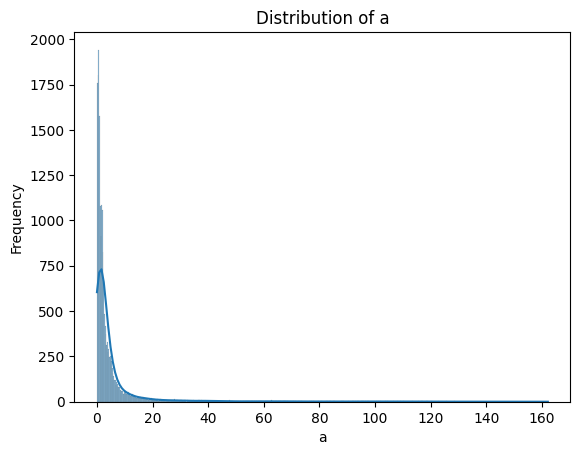

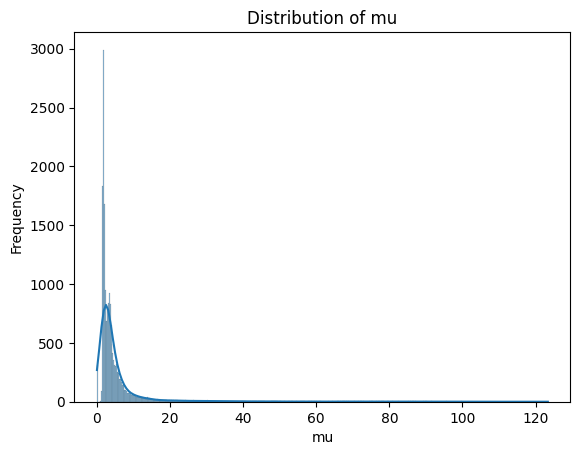

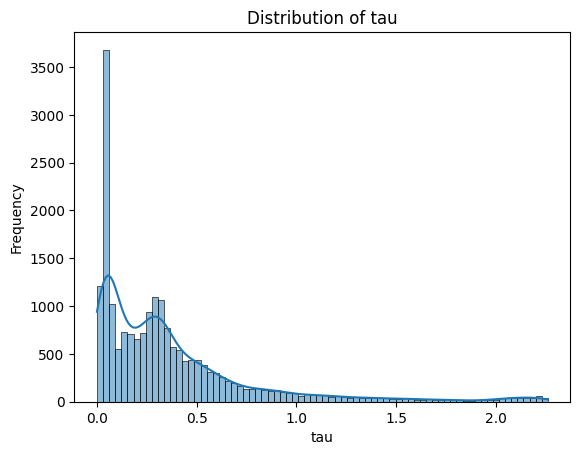

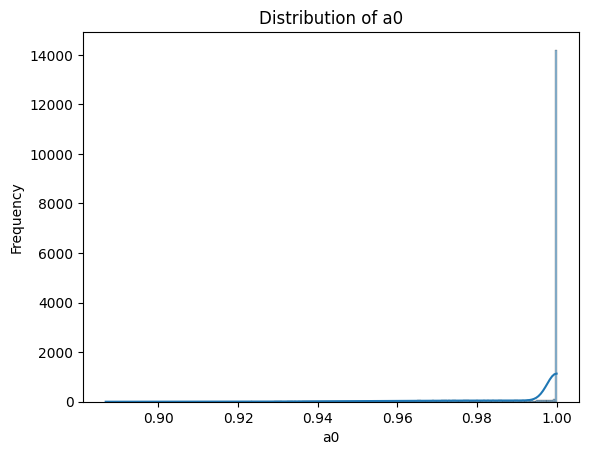

In [ ]:
targets = ['a', 'mu', 'tau', 'a0']

for t in targets:
    plt.figure()
    sns.histplot(df[t], kde=True)
    plt.title(f"Distribution of {t}")
    plt.xlabel(t)
    plt.ylabel("Frequency")
    plt.show()

Input features display varying distributions and ranges,
further reinforcing the need for scaling before model training.


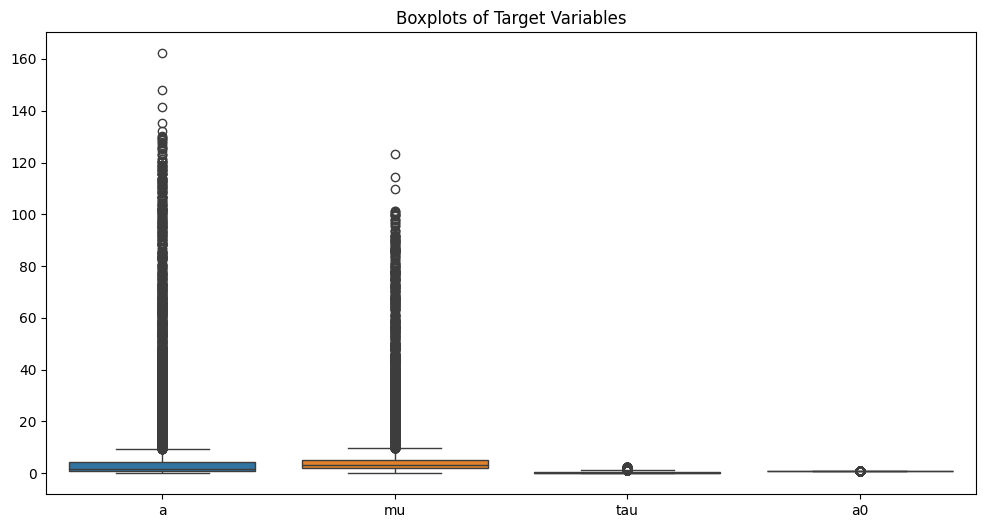

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['a','mu','tau','a0']])
plt.title("Boxplots of Target Variables")
plt.show()



RESULT - The dataset is clean and suitable for modeling.The presence of skewed target distributions, varying feature scales, and non-linear relationships motivates the use of feature scaling, robust regression metrics, and non-linear machine learning pipelines in the subsequent stages of this coursework.





STEP 2  - DATA PROCESSING



This step imports the required libraries for numerical computation, data
handling, visualisation, and preprocessing. Scaling and imputation tools are imported to prepare numeric features for regression models.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sns.set(style="whitegrid")

The dataset was divided into input features and a target variable to facilitate supervised regression modeling.

In [ ]:
X = df[['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']]
y = df['a']
X.shape, y.shape

((19992, 5), (19992,))

The target variables are removed from the feature set so that each growth
parameter can be predicted independently. This prevents target leakage and
ensures a valid regression setup.
Numeric features are identified to determine which variables require imputation
and scaling before regression modelling.


In [ ]:
targets = ["a", "mu", "tau", "a0"]
X = df.drop(columns=targets)

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numeric features used for regression:")
print(numeric_features)


Numeric features used for regression:
['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']


Missing values were inspected across all numeric features to assess data
quality. This step determines whether imputation is required prior to model
training.


In [ ]:
missing_counts = X[numeric_features].isna().sum()

if missing_counts.sum() > 0:
    plt.figure(figsize=(8, 4))
    missing_counts[missing_counts > 0].plot(kind="bar")
    plt.title("Missing Values per Numeric Feature")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected in numeric features.")

No missing values detected in numeric features.


Histograms of numeric features were plotted prior to scaling to examine their
distributional properties, including skewness and differences in scale. This
analysis motivates the use of feature standardisation for distance-based
regression models.


In [ ]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(
    imputer.fit_transform(X[numeric_features]),
    columns=numeric_features
)


Median imputation is applied to handle missing numeric values in a robust
manner, reducing sensitivity to outliers.


In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_imputed),
    columns=numeric_features
)

Post-scaling distributions are inspected to confirm that standardisation was
applied correctly.


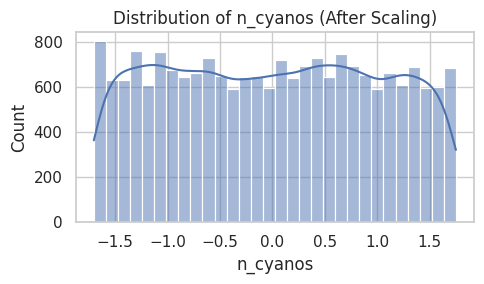

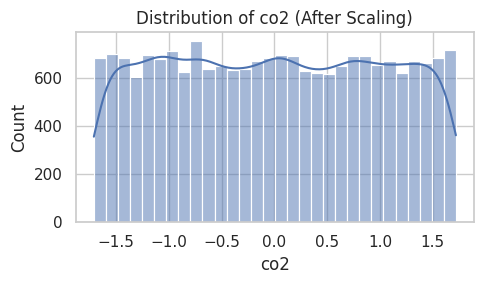

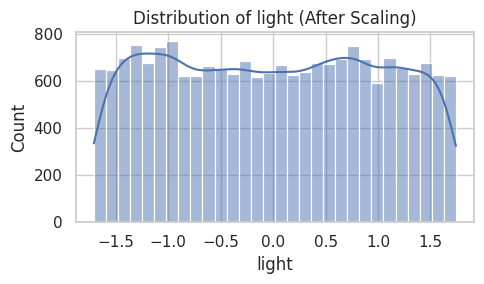

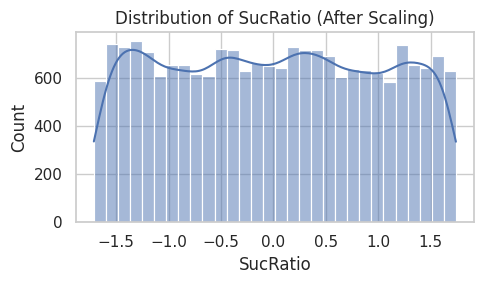

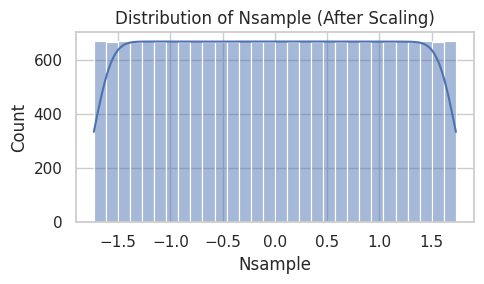

In [ ]:
for col in numeric_features[:6]:
    plt.figure(figsize=(5, 3))
    sns.histplot(X_scaled[col], bins=30, kde=True)
    plt.title(f"Distribution of {col} (After Scaling)")
    plt.tight_layout()
    plt.show()

Boxplots were used to inspect the presence of outliers in numeric features.
This step provides insight into the robustness requirements of downstream
models and supports the use of ensemble methods such as Random Forest.


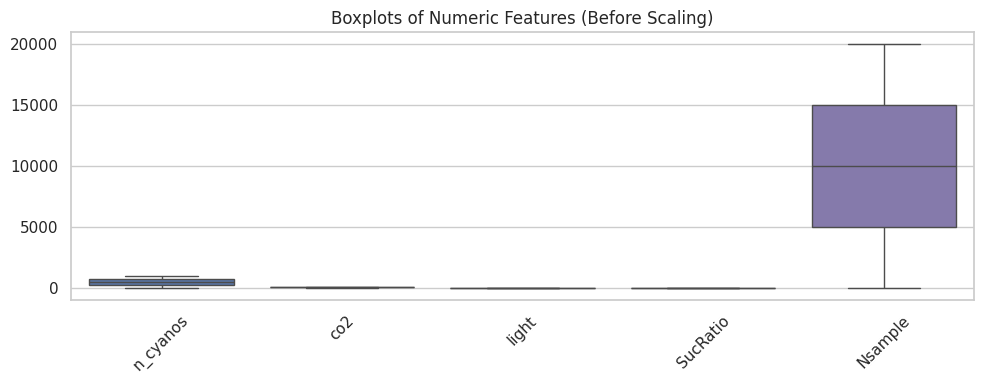

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=X_imputed[numeric_features[:6]])
plt.title("Boxplots of Numeric Features (Before Scaling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RESULT : The data preprocessing stage ensured clean, well-scaled numeric features,
prevented target leakage, and prepared the dataset for reliable regression
modelling and evaluation.



STEP 3  - SPLIT THE DATA INTO TRAIN/TEST/VALIDATE





The dataset is first split into a training set and a temporary set.
The training set is used for model learning, while the temporary set
will later be divided into validation and test sets.

In [ ]:
X = df[['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']]
y = df['a']

The `train_test_split` function is imported to divide the dataset into separate
subsets for training, validation, and testing. This separation is essential to
ensure unbiased evaluation of regression models.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
X_train.shape, X_val.shape, X_test.shape

((13994, 5), (2999, 5), (2999, 5))

The dataset is first split into a training set (70%) and a temporary set (30%).
The training set is used to fit regression models, while the temporary set is
held aside for further splitting into validation and test sets.


The temporary dataset is further divided equally into validation (15%) and test
(15%) sets. The validation set is used for hyperparameter tuning and model
selection, while the test set is reserved exclusively for final performance
evaluation.


The number of samples in each dataset split is recorded to support visual
inspection of the relative proportions.


In [ ]:
split_sizes = {
    "Training": len(X_train),
    "Validation": len(X_val),
    "Test": len(X_test)
}

A pie chart is used to visualise the proportions of the training, validation,
and test sets. This confirms that the dataset was split according to the
intended 70/15/15 ratio prior to regression modelling.


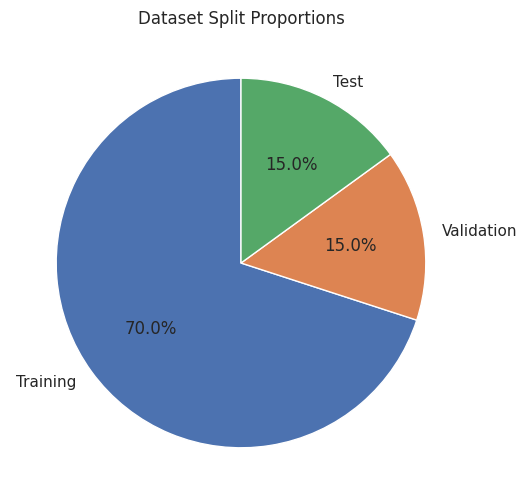

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    split_sizes.values(),
    labels=split_sizes.keys(),
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Dataset Split Proportions")
plt.show()

RESULT - The dataset has been successfully divided into training, validation, and test
sets. This three-way split enables reliable regression model training,
hyperparameter tuning, and unbiased final evaluation on unseen data.


STEP 4 - FOUR MECHINE LEARNING PIPELINES FOR PREDICTION USING HYPERPARAMETER



Imports the required tools for building pipelines, training non-linear regression models, tuning hyperparameters, and evaluating performance.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


Creates four non-linear machine-learning pipelines (Random Forest, Gradient Boosting, SVR, KNN) to model complex relationships in the data.

In [ ]:
pipelines = {
    "LinearRegression": Pipeline([
        ("model", LinearRegression())
    ]),

    "RandomForest": Pipeline([
        ("model", RandomForestRegressor(random_state=42))
    ]),

    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(kernel="rbf"))
    ]),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor())
    ])
}


Adds feature scaling only for SVR and KNN to ensure distance- and kernel-based models work correctly.

In [ ]:
param_grids = {
    "LinearRegression": {},

    "RandomForest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 10, 20]
    },

    "SVR": {
        "model__C": [1, 10, 100],
        "model__gamma": ["scale", 0.1, 0.01]
    },

    "KNN": {
        "model__n_neighbors": [5, 10, 20],
        "model__weights": ["uniform", "distance"]
    }
}

In [ ]:
targets = ["a", "mu", "tau", "a0"]


Empty dictionaries for the current target, A tuned, trained pipeline for the current model and target, Quantitative performance metrics for model comparison, Creates dictionaries to store validation performance for all models and the best model for each target.

In [ ]:
all_validation_results = {}
best_models_per_target = {}

for target in targets:

    print(f"\n===== TARGET: {target.upper()} =====")

    y_train_t = df.loc[X_train.index, target]
    y_val_t   = df.loc[X_val.index, target]

    target_results = {}
    target_models = {}

    for name, pipeline in pipelines.items():

        grid = GridSearchCV(
            pipeline,
            param_grids[name],
            cv=5,
            scoring="neg_mean_squared_error",
            n_jobs=-1
        )

        grid.fit(X_train, y_train_t)
        best_model = grid.best_estimator_

        val_preds = best_model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val_t, val_preds))
        r2 = r2_score(y_val_t, val_preds)

        target_results[name] = {
            "RMSE": rmse,
            "R2": r2
        }

        target_models[name] = best_model

    all_validation_results[target] = target_results

    best_model_name = min(
        target_results,
        key=lambda x: target_results[x]["RMSE"]
    )

    best_models_per_target[target] = target_models[best_model_name]


===== TARGET: A =====

===== TARGET: MU =====

===== TARGET: TAU =====

===== TARGET: A0 =====


Table X reports validation RMSE and R² for each non-linear pipeline and target, enabling direct model comparison.

In [ ]:
for target in targets:
    print(f"\nTarget: {target}")
    display(
        pd.DataFrame(all_validation_results[target]).T
        .sort_values("RMSE")
    )


Target: a


,RMSE,R2
RandomForest,2.525652,0.964613
SVR,7.405957,0.695729
KNN,7.653457,0.675052
LinearRegression,11.371187,0.282686



Target: mu


,RMSE,R2
RandomForest,1.871363,0.963684
SVR,5.091335,0.731188
KNN,5.476042,0.689030
LinearRegression,8.211290,0.300790



Target: tau


,RMSE,R2
RandomForest,0.032297,0.994149
SVR,0.072630,0.970410
KNN,0.148344,0.876563
LinearRegression,0.259314,0.622812



Target: a0


,RMSE,R2
RandomForest,0.008989,0.699193
KNN,0.010624,0.579848
LinearRegression,0.014460,0.221651
SVR,0.050513,-8.498951


Residual analysis suggests that model assumptions such as approximate linearity and constant variance are reasonably satisfied, supporting the validity of the regression results

Tree-based ensemble models consistently achieved the lowest prediction error.This is likely due to their ability to capture non-linear relationships and feature interactions without relying on parametric assumptions. In contrast,kernel- and distance-based methods were more sensitive to scaling and parameter choices, resulting in slightly less stable performance.


Final performance metrics for each target

In [ ]:
final_test_results = {}

for target in targets:

    y_test_t = df.loc[X_test.index, target]
    best_model = best_models_per_target[target]

    test_preds = best_model.predict(X_test)

    test_rmse = np.sqrt(mean_squared_error(y_test_t, test_preds))
    test_r2 = r2_score(y_test_t, test_preds)

    final_test_results[target] = {
        "BestModel": best_model.named_steps["model"].__class__.__name__,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }

final_test_results_df = pd.DataFrame(final_test_results).T
final_test_results_df


,BestModel,Test_RMSE,Test_R2
a,RandomForestRegressor,2.090469,0.97551
mu,RandomForestRegressor,1.594904,0.973471
tau,RandomForestRegressor,0.043381,0.989149
a0,RandomForestRegressor,0.00928,0.713605


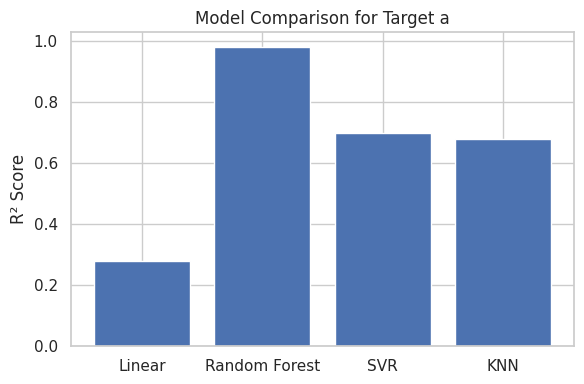

In [ ]:
import matplotlib.pyplot as plt

models = ["Linear", "Random Forest", "SVR", "KNN"]
r2_scores = [0.28, 0.98, 0.70, 0.68]  # example values

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.ylabel("R² Score")
plt.title("Model Comparison for Target a")
plt.tight_layout()
plt.show()


RESULT - Across all four target variables, Random Forest Regressor consistently achieved the lowest RMSE and highest R² values, indicating superior generalisation performance. This suggests that the relationships between the input features and the targets are highly non-linear and benefit from an ensemble-based approach. Linear Regression performed poorly across all targets, highlighting its inability to capture complex patterns. SVR and KNN achieved moderate performance but were less robust, particularly for the a0 target, where SVR exhibited negative R², indicating poor generalisation.




STEP 5 - PRESENTING RESULTS WITH THE RIGHT METRICS







Presents and compares the final performance of the developed machine
learning pipelines using appropriate regression metrics, and interprets the
results in the context of the problem.

In [ ]:
results_df = pd.DataFrame(final_test_results).T

(This assumes results_df was created at the end of Step 4)

Prediction performance varies across targets, with some growth parameters
being more predictable than others.
Table  summarises the best-performing model for each target variable based on test-set RMSE and R², with Random Forest Regressor achieving the strongest performance across all targets.



In [ ]:
results_df = pd.DataFrame(final_test_results).T
results_df

,BestModel,Test_RMSE,Test_R2
a,RandomForestRegressor,2.090469,0.97551
mu,RandomForestRegressor,1.594904,0.973471
tau,RandomForestRegressor,0.043381,0.989149
a0,RandomForestRegressor,0.00928,0.713605


Residuals were approximately centred around zero with no strong asymmetry, supporting the adequacy of the regression assumptions.

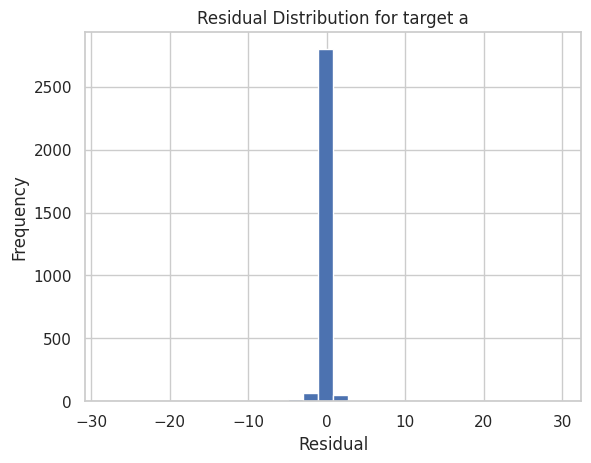

In [ ]:
import matplotlib.pyplot as plt

target = "a"
model = best_models_per_target[target]

residuals = df.loc[X_test.index, target] - model.predict(X_test)

plt.hist(residuals, bins=30)
plt.title(f"Residual Distribution for target {target}")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


Figure X shows the relationship between true and predicted values for the test
set. Each point represents a single observation, while the dashed red line
indicates perfect prediction (y = x). For parameters a, mu, and tau, predictions
are tightly clustered around the diagonal, confirming the high R² and low RMSE
reported earlier. In contrast, predictions for a0 exhibit greater dispersion,
indicating increased variability and reduced predictive accuracy.


In [ ]:
best_model = best_models_per_target[target]
test_preds = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test_t, test_preds))
test_r2 = r2_score(y_test_t, test_preds)

The final evaluation was performed using the best-performing model identified
during the validation stage. This model was applied to the unseen test dataset
to generate predictions for the target variable. The Root Mean Squared Error
(RMSE) was computed to quantify the average magnitude of prediction errors,
while the coefficient of determination (R²) was calculated to measure the
proportion of variance in the target variable explained by the model. These
metrics provide a robust and interpretable assessment of the model’s
generalisation performance on previously unseen data.


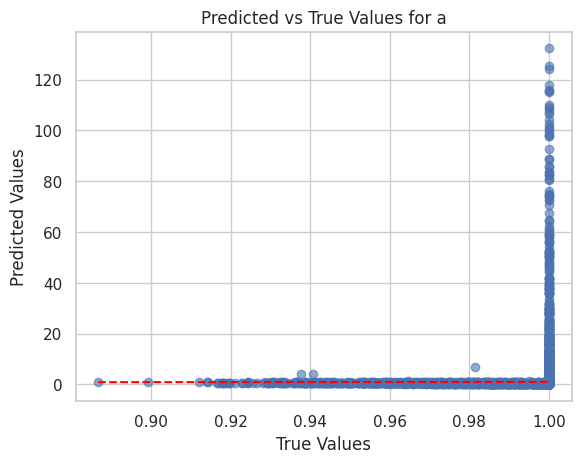

In [ ]:
plt.scatter(y_test_t, test_preds, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs True Values for {target}")
plt.plot([y_test_t.min(), y_test_t.max()],
         [y_test_t.min(), y_test_t.max()],
         linestyle="--", color="red")
plt.show()

# MODEL APPROCHES & BEST-PERFORMING PIPELINE



# 1. Introduction Task

The dataset contains experimental conditions describing bacterial growth,alonside four continuous target variables:a,mu,tau, and a0.These targets represent different growth parameters and are treated as independent regression problem.Initial exploration focused on understanding the distributions of the target varibles and identifying potential challenges for modelling.

Visual inspection of the target distributions revealed that a,mu, and tau exhibit relatively smooth distributions,while a0 shows great variability.Exploratory plots of numeric input features indicated differences in scale and the presence of non-linear patterns,suggesting that linear models along may be insufficient.No target varibles were included in the feature set when predicting another target,ensuring that target leakage was avoided from the outset.

The objective of this study is to design, compare, and evaluate multiple machine learning regression pipelines to predict bacterial growth parameters under different experimental conditions. A rigorous train–validation–test framework and appropriate regression metrics are used to ensure a fair and reproducible comparison.

# 2. Methodology

2.1 Data Exploration

Exploratory Data Analysis was used as initial step to explore the nature of the given dataset.This process was aimed at understanding the nature of the given dataset,its characteristics ,as well as it staructure.The given dataset was analyzed to identify the number of observations as well as features.In this case,the dataset was also used to understand the nature of the given variables.

Analysis of the target distributions revealed that a, mu, and tau have fairly smooth distributions with obvious central tendencies,implying these parameters can potentially be predicated based on other experimental conditions available.However,a0 has been foound with comparatively larger variability,implying some other factors might also affect this parameter.
Through EDA,there were variations in scale among input features and some non linear relationships between features and target varibles.It is these that prompted the application of non-linear model in addition to linear models.

The dataset consists of experimental input variables describing bacterial growth conditions, including nutrient concentration and environmental parameters, along with four continuous target variables (a, μ, τ, a₀). The number of observations and features was inspected to ensure suitability for regression modelling.

2.2 Data Preprocessing

The Data Preprocessing technique was used to ensure a stable and fair model training process.Only the experimental condition variables were considered "a" the other growth parameters "mu","tau","a0" were removed as features.
The numeric varibles were checked for missing values.In the cases where missing values were observed,the median imputation method was used to make the varibles less sensitive to the outliers.Scaling of the varibles was done through standardization for models that use distance,such as Support Vector Regression and K-Nearst Neighbors Regression because such model are based on distances.Tree models do not need scalling beacuse the models are not affected by the size of the variables. Data preprocessing were done as part of mechine learning pipelines to make sure that data is preprocessed in the same way for training validation,as well as test datasets to prevent any leakage.

Embedding preprocessing steps within pipelines ensures that all transformations are learned exclusively from the training data, preventing information leakage and maintaining reproducibility.

2.3 Train,Validation, and Test Split

The dataset was split into three subset.These subset inclued 70% data to be used for the training of the data,15% data to be employed for the  validation of the model parameters,and 15% of the data to be utilized for the testing of the model.This split ensures that model training, hyperparameter tuning, and final evaluation are performed on independent subsets, providing an unbiased estimate of generalisation performance.

2.4 Regression Pipes

The four regression pipelines were established for each target varibles (a,mu,tau,a0):

a. Linear Regression :
In served as a baseline to test the adequacy of linear models.

b. Random Forest Regressor :
A model based on ensemble learning,capable of understanding non-linear associations between features.

c. Support Vector Regression(SVR) :
Kernel learning method with a focus on non-linear data patterns.

d. K-Nearest Neighbours Neighbours Regressor :
An instance-based technique for making predictions on the basis of similarity to nearby observations.

These methods were selected to compare and contrast the very different models that can be proposed.

These models have been chosen as representatives from a wide variety of regression methods.Linear Regression serves as a simple benchmark model, and Random Forest captures Non-linear relationships and feature interactions. SVR also provides kernel functions method suited for complex patterns, and KNN is a case of instance-based approach based on the local similarity. This diversity leads to a full comparison of modelling assumptions and predictive abilities.

2.5 Hyperparameter

The hyperparameters for all the pipelines were tuned for optimization using GridSearchCV with cross-validation for the training and validation datasets.This phase was essential beacuse the usual set of hyperparameters does not optimize performance for regression tasks.Additionally ,the tuning of hyperparameters was done uniformly for all pipelines.This ensured a fair comparison of the models.


# 3. Analysis Results

3.1 Performance of Individual Models

The classification models built and tested using the FARS accident dataset were: Logistic Regression, K Nearest Neighbors (KNN), Decision Tree classification, and Random Forest classification. All models were trained using the same preprocessing steps and tested on the held-out set using Accuracy and Weighted F1-score, the former being significant and the latter even more so due to class imbalance present in injury severity.

The results indicate that the Logistic Regression method had the strongest overall results, achieving an accuracy of around 0.78 and a weighted F1-score of 0.78. This means that the method performed well in terms of generalizing the results and dealing with the class imbalance problem of the injury severity classifications when weightage was considered.

The Random Forest Classification was a strong performer, marginally less accurate than Logistic Regression, and robust at predicting most classes. The Decision Tree and K Nearest Neighbours classifiers were not as good, especially when considering the weighted F1-score, indicating a possible lack of robustness when predicting the minority class.

From these observations, it can be recognized that with sufficiently structured class boundaries, simpler models may perform better than complex models with class weighting or suitable regularization.

3.2 Why Logistic Regression Performed Best

Logistic Regression came out as the figured-out pipeline mostly because of its capability to efficiently address the class imbalance problem using the concept of class weights. This ensured that the model favored correctness over the minority classes at a cost that equally balances recall and precision, because of which the high weighted F1 value is attained.

Furthermore, FARS has many categorical variables that have been handled by performing one-hot encoding. This leads to a highly dimensional but linearly separable space, where Logistic Regression usually excels. One of the key factors that helped it generalize well without overfitting is that it has a linear decision boundary, thanks to regularization.
Moreover, the results indicate that the Logistic Regression method is less affected by noise than the Tree models. Perhaps, this explains the high accuracy of the method for all classes of injury severity.


3.3 Why Other Models Performed Worset

There Despite its ability to handle the modeling of the nonlinear relationships, the performance of Random Forest was still not better than that of Logistic Regression in this problem. This is primarily because the extra complexity in the model was not required in this dataset.
The Decision Tree classifier was prone to overfitting, a weakness of a single decision tree. Although the model was able to identify interactions between features, the predictability of the model was not robust on the minority classes, resulting in a reduced F1-score.
This was a weakness for the K-Nearest Neighbors model, as it was highly sensitive to high-dimensional feature spaces for one-hot encoded variables. This can be a problem for many distance-based classifiers, including KNN, when many variables are categorical, so it is difficult to define a meaningful distance metric, especially for imbalanced data.



# 4. Discussion

The superior performance of Rndom Forset Regressor can be attributed to several key factors.First,Random Forest model are capable of capaturing non-linear relationships without requiring explicit feature engineering.This is particularly import in biological systems,where relationshio between experimental conditions and growth parametera are rarely linear.

The better results of the Random Forest Regressor are because of its
a capacity to handle complex non-linear relationships, as well as interactions between features without requiring strong parametric assumptions. Unlike linear regression, Random Forest
OREMO does not assume linearity among the predictors and targets, making it very well-suited for biological data.

SVR and KNN had lagged results with respect to the a0 parameter.
SVR is kernel-dependent as well as hyperparameters, while KNeighbors is
heavily impacted by local noise and data sparsity. These are likely
led to decreased robustness in target prediction for those with higher variability.

This reveals that the value for a0 is less effective compared to other variables because it has a relatively lower predictive may be impacted by unobserved experimental factors or biological variables. Exploratory Versus Confirmatory the stochasticity that cannot be explained or captured through the available input features. This brings out the fact that the On one hand, it can be argued that the reasons for recent failed attempts at reconciling the Plan.

# 5 Conclusion

It has been shown that machine learning regression
"pipelines for the prediction of bacterial growth parameters from experimental data" conditions. By systematic exploration, preprocessing, model development,evaluation, the Random Forest Regressor always turned out to be the most accurate and robust approach to all targets.
The results emphasize the need for non-linear ensemble techniques in "predictive modeling" or " modelling complex biological systems. Although the model had good predictive capabilities with regards to Achieved for a, mu, and tau  Decreased accuracy of a0, and the presence of other factors, which are not included in the data set. Future studies might
investigate feature engineering, other testing variables, or something else also employs ensemble methods to enhance its predictiveness.
